d:\anaconda\envs\rdkit2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


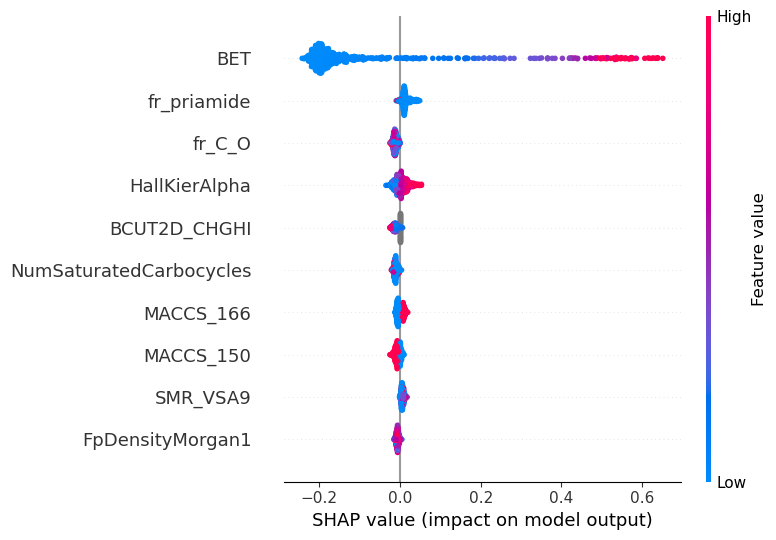

In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import os

# 文件路径
CSV_PATH = "shap_values_tabpfn_binary.csv"
DATA_PATH = "classification_input_binary_with_original.csv"

# 读取数据
df_shap = pd.read_csv(CSV_PATH)
data = pd.read_csv(DATA_PATH)

# 特征和 SHAP 值矩阵
feature_names = df_shap.columns[1:]
X = data.iloc[:, 3:]
shap_matrix = df_shap.iloc[:, 1:].values

# 输出目录
FIG_DIR = "summary_plots/"
os.makedirs(FIG_DIR, exist_ok=True)

# Summary plot (前10个特征)
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_matrix, 
    features=X, 
    feature_names=list(feature_names),
    max_display=10,   # 只显示前10个
    show=False
)
plt.savefig(os.path.join(FIG_DIR, "summary_top10.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()


<Figure size 700x500 with 0 Axes>

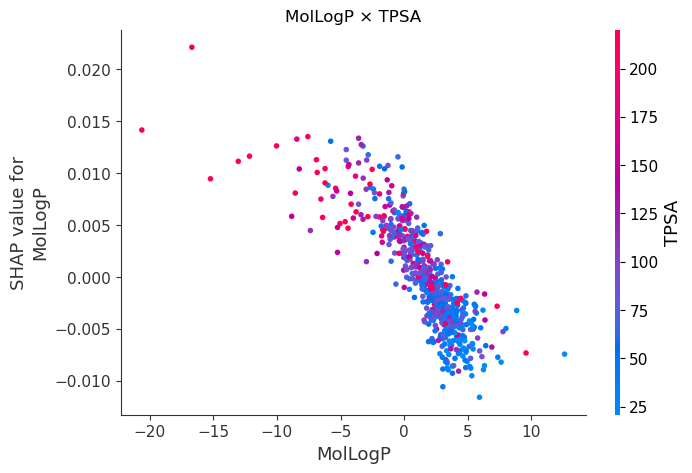

<Figure size 700x500 with 0 Axes>

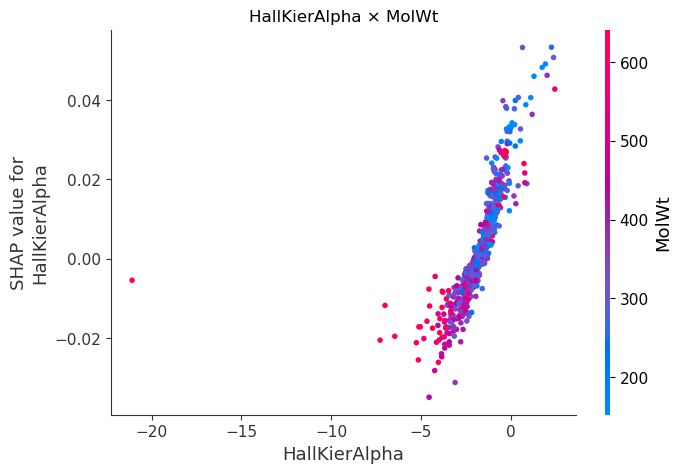

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
import os

CSV_PATH = "shap_values_tabpfn_binary.csv"
DATA_PATH = "classification_input_binary_with_original.csv"

df_shap = pd.read_csv(CSV_PATH)
data = pd.read_csv(DATA_PATH)

feature_names = df_shap.columns[1:]
X = data.iloc[:, 3:]                
shap_matrix = df_shap.iloc[:, 1:].values

pairs = [
    ("MolLogP", "TPSA")
]

FIG_DIR = "interaction_plots/"
os.makedirs(FIG_DIR, exist_ok=True)

for main_feat, inter_feat in pairs:
    plt.figure(figsize=(7,5))
    shap.dependence_plot(
        ind=main_feat,
        shap_values=shap_matrix,   
        features=X,         
        feature_names=list(feature_names),
        interaction_index=inter_feat,
        show=False
    )
    plt.title(f"{main_feat} × {inter_feat}")
    plt.savefig(os.path.join(FIG_DIR, f"{main_feat}_{inter_feat}.png"), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()
